In [1]:
import pandas as pd

train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')

In [2]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
train['datetime'] = pd.to_datetime(train["datetime"])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

<AxesSubplot:xlabel='second', ylabel='count'>

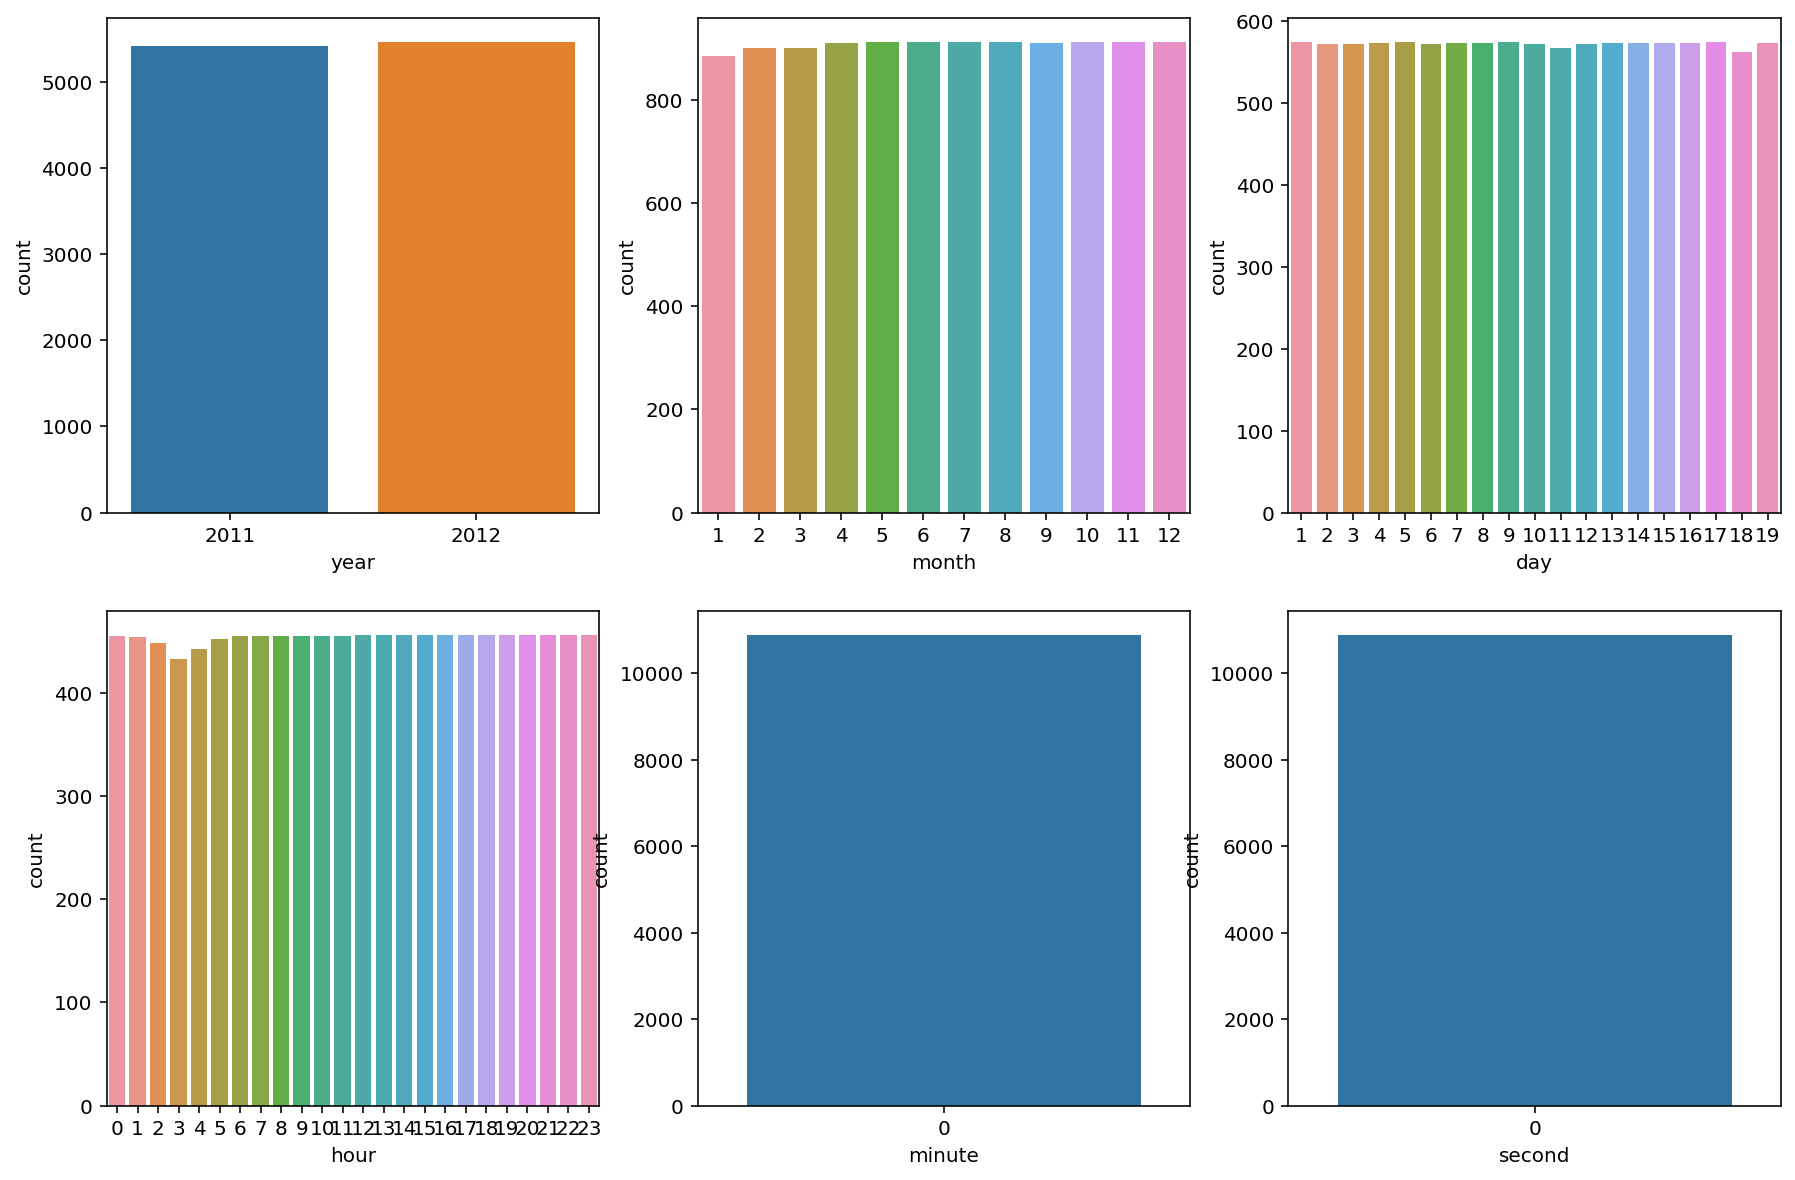

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.

plt.figure(figsize=(15, 10))
plt.subplot(231)
sns.countplot(x='year', data=train)

plt.subplot(232)
sns.countplot(x='month', data=train)

plt.subplot(233)
sns.countplot(x='day', data=train)

plt.subplot(234)
sns.countplot(x='hour', data=train)

plt.subplot(235)
sns.countplot(x='minute', data=train)

plt.subplot(236)
sns.countplot(x='second', data=train)

In [5]:
X = train.drop(['casual', 'registered', 'minute', 'second', 'datetime', 'count'], axis=1)

In [6]:
y = train['count']
y.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('rmse:', mse ** 0.5)
print('mse:', mse)

rmse: 141.74403799258616
mse: 20091.37230644371


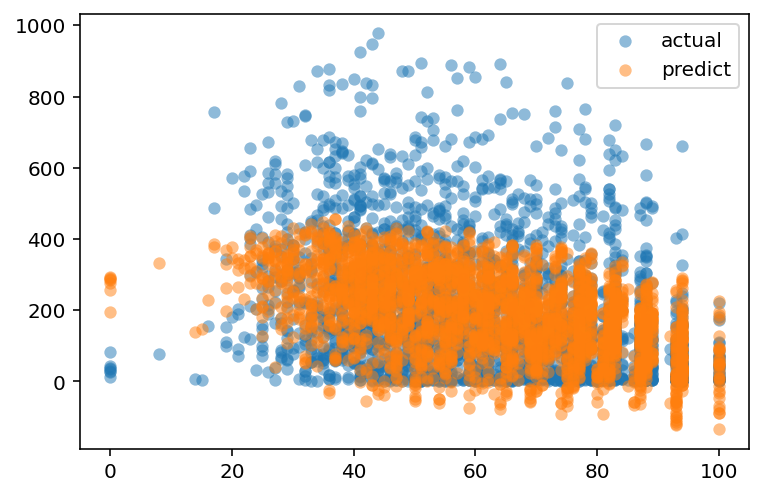

In [8]:
plt.scatter(X_test['humidity'], y_test, linewidths=0.1, alpha=0.5, label='actual')
plt.scatter(X_test['humidity'], y_pred, linewidths=0.1, alpha=0.5, label='predict')
plt.legend()

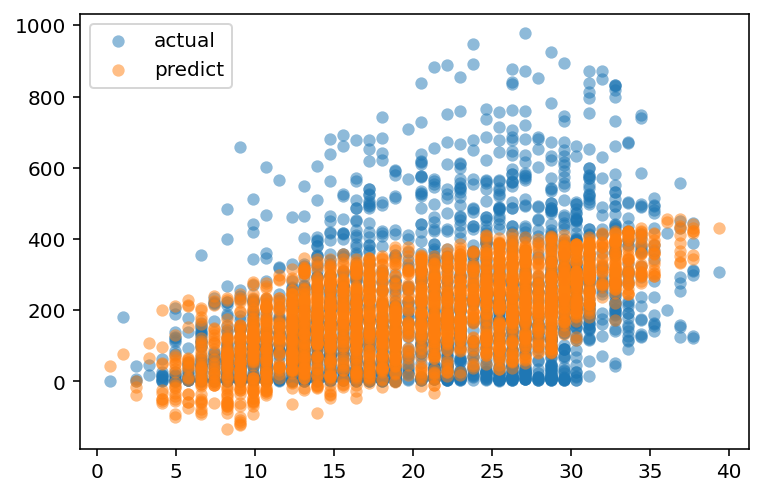

In [9]:
plt.scatter(X_test['temp'], y_test, linewidths=0.1, label='actual', alpha=0.5)
plt.scatter(X_test['temp'], y_pred, linewidths=0.1, label='predict', alpha=0.5)
plt.legend()